In [1]:
from tools import *
from plots import *
from RegularGrid import RegularGrid

In [2]:
# reload automaticaly external modules
%load_ext autoreload
%autoreload 2

### **Rows**, **Columns**

In [3]:
degree = 3
rows = 3
cols = 3

In [4]:
grid = RegularGrid(degree, rows, cols)

### **Deployed** and **Undeployed**

In [5]:
undeployed_cells = grid.vline(1)
deployed_cells  = grid.vline(0) 

- grid.border()
- grid.center()
- grid.vline(line_idx)
- grid.hline(line_idx)
- grid.cross(arm_length)

---

In [6]:
# extremities
active_cells    = deployed_cells + undeployed_cells
target_percents = [100]*len(deployed_cells) + [0]*len(undeployed_cells) # 0:undeployed | 100:deployed

In [7]:
# linear
# active_cells    = grid.hline(1) + grid.hline(4)
# target_percents = linear_height_ls(grid.hline(1)) + linear_height_ls(grid.hline(4))

In [8]:
# for c,p in zip(active_cells, target_percents):
#     print(f'cell:target percent - {c:0>2}:{p: >3.0f}%')

In [9]:
grid.generate_mesh()

PLATE CHARACTERISTIQUES:
	plate thickness   : 0.021123
	plate edge length : 0.211231


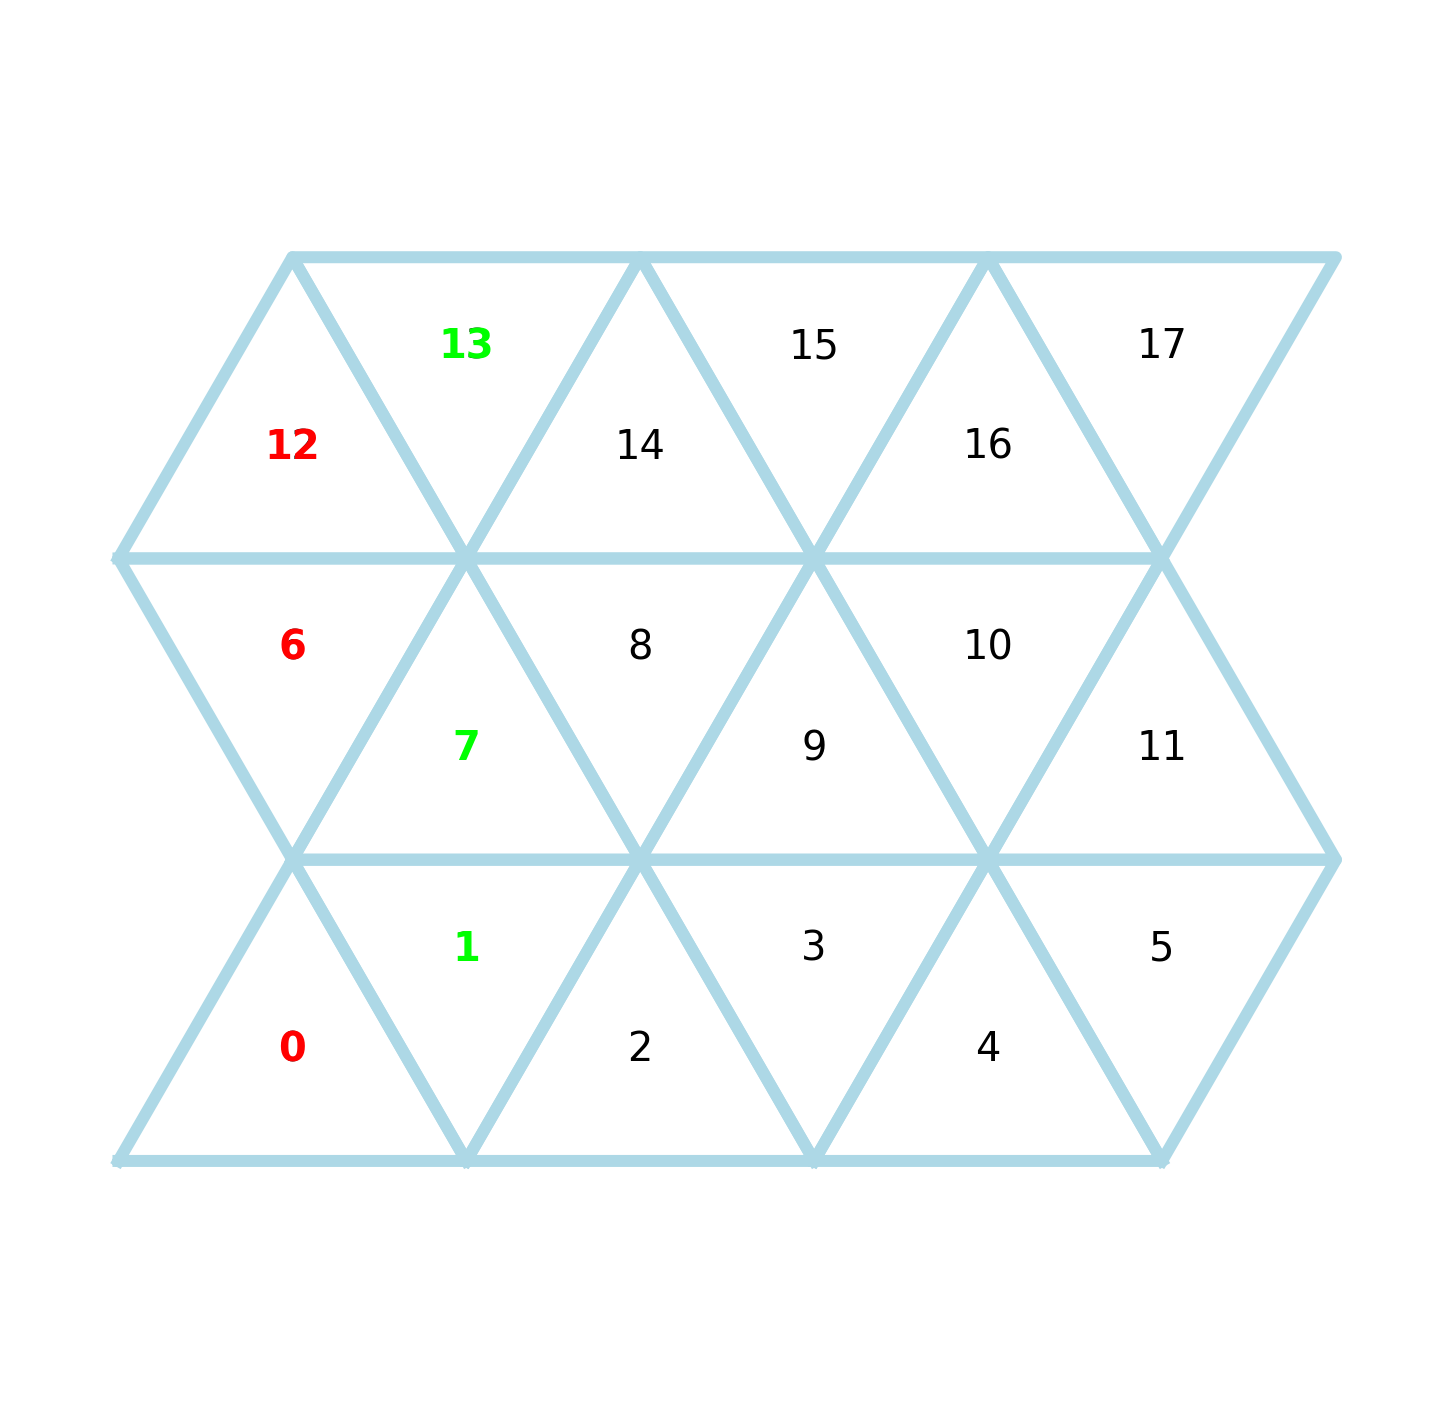

In [10]:
plot2D(grid.input_data, grid.curr_um, show_height=False, active_cells=active_cells, target_percents=target_percents)

In [11]:
view3D = plot3D(grid.curr_um, grid.input_data)
view3D.show()

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(PointLight(color='#999999', position=(0…

In [12]:
grid.deploy(active_cells, target_percents, view3D)

success: True 

energies:
   -5.998730: Full
    0.001223: Elastic
   -5.999953: Deployment
    0.000000: Repulsion
    0.000000: Attraction
    0.000000: AngleBoundPenalty



In [13]:
if grid.rows==1 or grid.cols==1:
    file_name = path_name+'/projection2D.png'
    projection2D(grid.input_data, grid.curr_um, active_cells=active_cells, target_percents=target_percents)

In [14]:
sview_vm = plot3D_stress(grid.curr_um, 'maxBending')
sview_vm.show()

maxBending Stresses Extrem values:
    max : 1.64e+02
    min : 0.00e+00


Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(PointLight(color='#999999', position=(0…

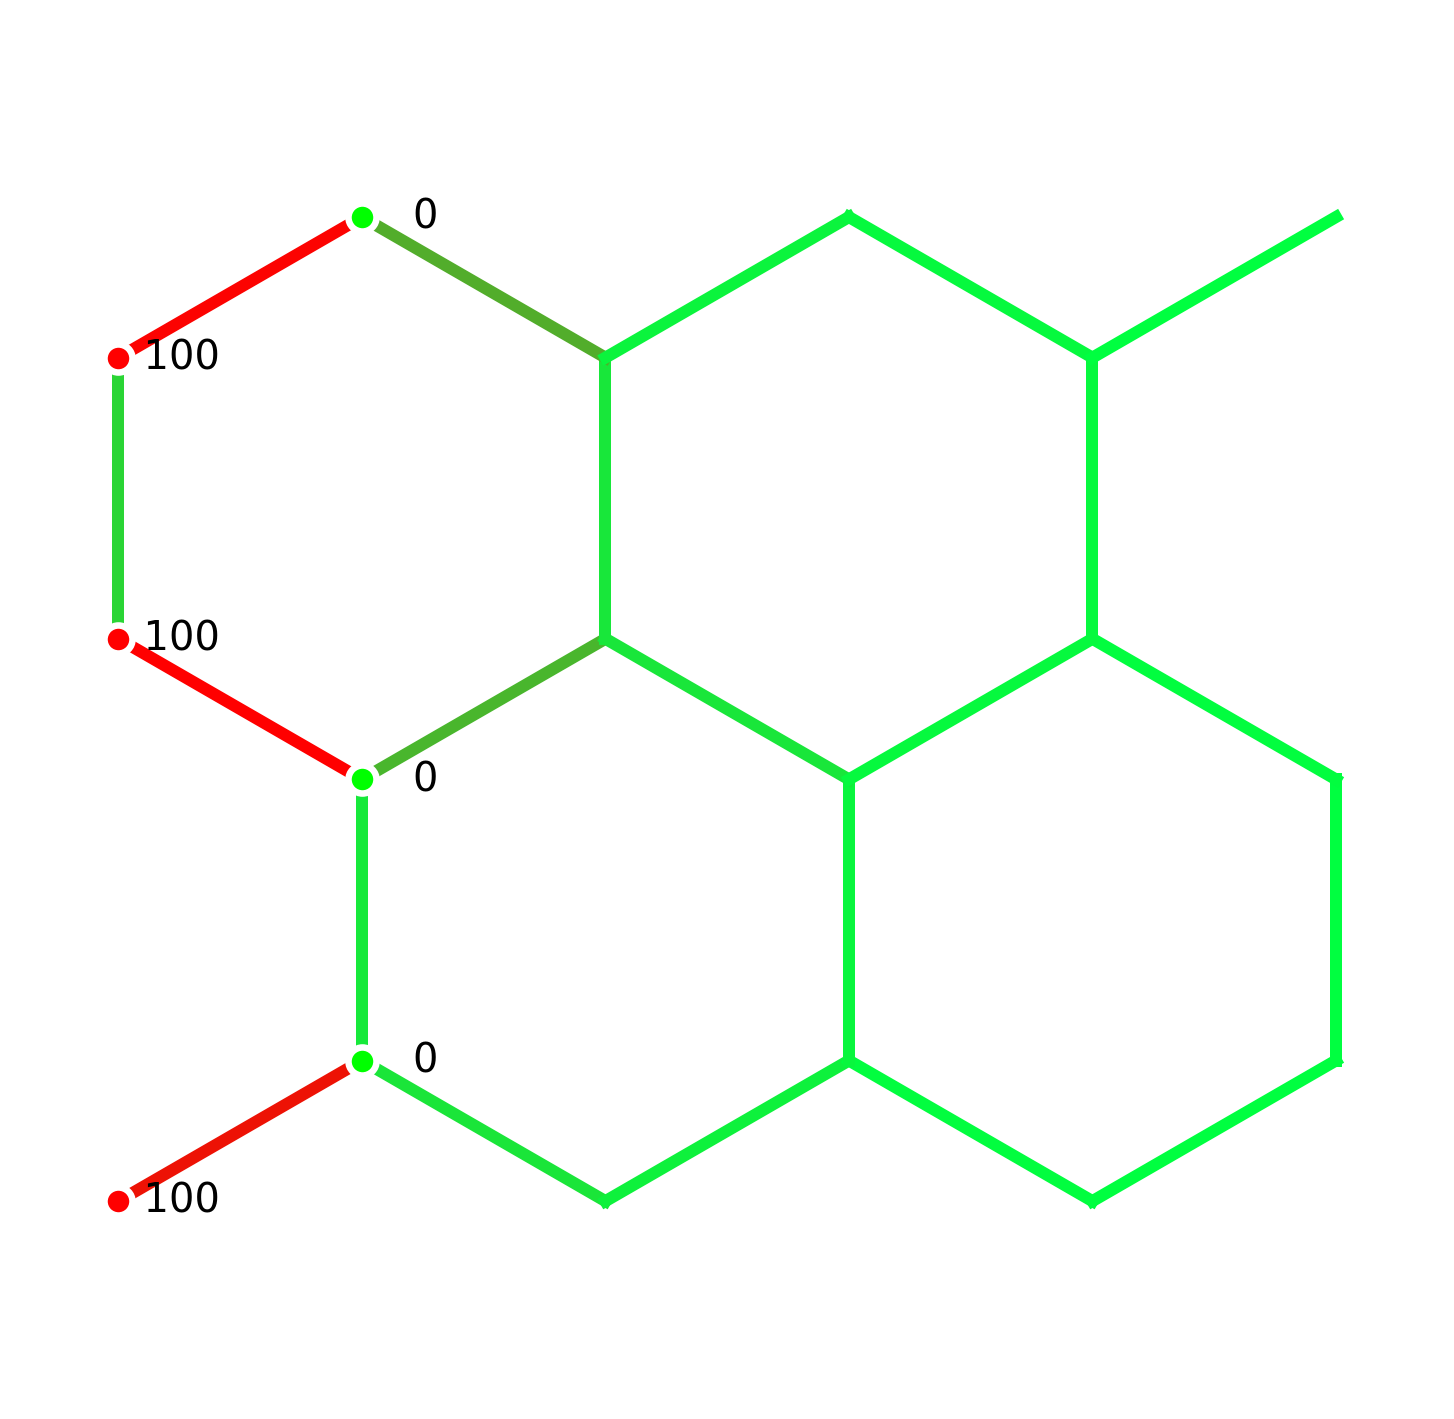

In [15]:
plot2D_stress(grid.curr_um, grid.input_data['umbrella_connectivity'], grid.init_center_pos, active_cells, target_percents, show_percent=True)